In [162]:
%pylab inline
plt.rc('text', usetex=True)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [163]:
n=5

In [164]:
def f(l):
    x = np.linspace(0,l,n-1)
    y = np.product(np.exp(-(x*x)/2)/np.sqrt(2.*np.pi))
    return y

In [165]:
f(5)

9.0996635987699714e-11

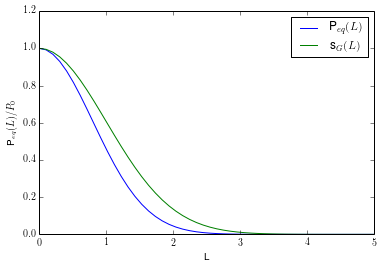

In [168]:
L = np.linspace(0,5,50)
vals = np.zeros(50)
for i,l in enumerate(L):
    vals[i] = f(l)*np.power(2*np.pi,(n-1)/2.)
plt.plot(L,vals)
#plt.plot(L,np.power(np.zeros(50)+2*np.pi,-(n-1)/2.))
plt.plot(L,np.exp(-L*L/2.)/np.power(2*np.pi,(n-1)/2.)*np.power(2*np.pi,(n-1)/2.))
plt.legend(('P_{eq}(L)', 's_G(L)'),loc='upper right')
plt.xlabel('L')
plt.ylabel('P_{eq}(L)/P_0')
plt.savefig('equal-spacing.pdf')

In [88]:
np.power(3,2)

9

In [117]:
from sympy import Symbol, symbols, solve, lambdify, integrate,exp, oo, product

In [126]:
(n, x, D, x0, s, L, i) =  symbols('n x D x0 s L i')

In [109]:
integrate(exp(-x*x/2)**n,(x, -oo, oo))

Piecewise((sqrt(2)*sqrt(pi)/sqrt(n), Abs(periodic_argument(n, oo)) <= pi/2), (Integral(exp(-x**2/2)**n, (x, -oo, oo)), True))

In [114]:
integrate(exp(-x*x/2)**(n-1) * exp(-(x-D)**2/2),(x, -oo, oo), conds='none')

-(-sqrt(2)*pi*D*exp(D**2/(2*n))*erf(sqrt(2)*D/(2*sqrt(n)))/(2*sqrt(n)) - sqrt(2)*pi*D*exp(D**2/(2*n))/(2*sqrt(n)))*exp(-D**2/2)/(sqrt(pi)*D) + (-sqrt(2)*pi*D*exp(D**2/(2*n))*erf(sqrt(2)*D/(2*sqrt(n)))/(2*sqrt(n)) + sqrt(2)*pi*D*exp(D**2/(2*n))/(2*sqrt(n)))*exp(-D**2/2)/(sqrt(pi)*D)

In [115]:
simplify?

Object `simplify` not found.


In [129]:
product(exp(-(x-i*L/(n-1))*(x-i*L/(n-1))/2), (i,0,n-1))

Product(exp((-L*i/(n - 1) + x)*(L*i/(n - 1) - x)/2), (i, 0, n - 1))

In [131]:
integrate(product(exp(-(x-i*L/(n-1))*(x-i*L/(n-1))/2), (i,0,n-1)),(x,-oo,oo),conds='none')

Integral(Product(exp((-L*i/(n - 1) + x)*(L*i/(n - 1) - x)/2), (i, 0, n - 1)), (x, -oo, oo))

In [132]:
integrate(product(exp(-(x-i*L/(3-1))*(x-i*L/(3-1))/2), (i,0,3-1)),(x,-oo,oo),conds='none')

sqrt(6)*sqrt(pi)*(-erf(sqrt(6)*L/4) + 1)*exp(-L**2/4)/6 + sqrt(6)*sqrt(pi)*(erf(sqrt(6)*L/4) + 1)*exp(-L**2/4)/6

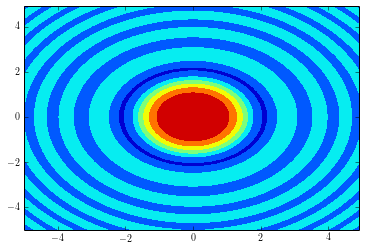

In [169]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)

In [247]:
def uniformPhones(n):
    return np.random.uniform(-10,10,n)

In [248]:
def stackPhones(n):
    x0 = np.random.uniform(-10,10)
    return np.zeros(n)+x0

In [303]:
def gaussPhones(n):
    x0 = np.random.uniform(-10,10)
    d=20.*n/210
    return np.random.normal(x0,d/2,n)

In [305]:
def patchPhones(n,rho=1.):
    d=20.*n/210/rho
    x0 = np.random.uniform(-10,np.maximum(-9.9,10-d)) #ensure all phones in [-10,10]
    return np.random.uniform(x0,x0+d,n)

In [293]:
def shower(x):
    pPhone = np.exp(-x**2)/np.sqrt(2*np.pi)
    dice = np.random.uniform(0,1,x.size)
    if sum(pPhone>dice) > 5:
        return 1
    else :
        return 0
    

In [294]:
def uniformPerf(n):
    ret  = 0.
    nExpt=10000
    for i in range(nExpt):
        ret += shower(uniformPhones(n))
    return ret/nExpt

In [295]:
def stackPerf(n):
    ret  = 0.
    nExpt=10000
    for i in range(nExpt):
        ret += shower(stackPhones(n))
    return ret/nExpt

In [296]:
def gaussPerf(n):
    ret  = 0.
    nExpt=10000
    for i in range(nExpt):
        ret += shower(gaussPhones(n))
    return ret/nExpt

In [307]:
def patchPerf(n,rho=1.):
    ret  = 0.
    nExpt=10000
    for i in range(nExpt):
        ret += shower(patchPhones(n,rho))
    return ret/nExpt

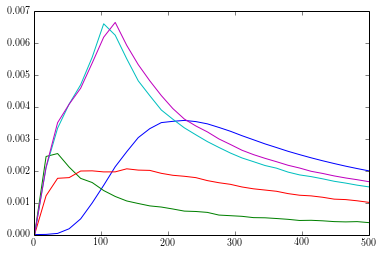

In [310]:
nArray = np.linspace(1,500,30)
uniformPerfArray = np.zeros(nArray.size)
stackPerfArray = np.zeros(nArray.size)
gaussPerfArray = np.zeros(nArray.size)
patchPerfArray = np.zeros(nArray.size)
patch2PerfArray = np.zeros(nArray.size)


for i,n in enumerate(nArray):
    uniformPerfArray[i] = uniformPerf(n)/n
    stackPerfArray[i] = stackPerf(n)/n
    gaussPerfArray[i] = gaussPerf(n)/n
    patchPerfArray[i] = patchPerf(n)/n
    patch2PerfArray[i] = patchPerf(n,1.1)/n



plt.plot(nArray,uniformPerfArray)
plt.plot(nArray,stackPerfArray)
plt.plot(nArray,gaussPerfArray)
plt.plot(nArray,patchPerfArray)
plt.plot(nArray,patch2PerfArray)

In [318]:
from scipy.special import gamma

In [857]:
def airShower(x):
    #N/(2 Pi rm^2) (r/rm)^(s - 2) (1 + r/rm)^(s - 4.5) Gamma[4.5 - s]/   Gamma[s] / Gamma[4.5 - 2 s]  
    rm = 0.078 #78 m molier radius
    r = np.sqrt(x[:,0]**2 + x[:,1]**2)/rm
    s=1.8
    N_muons = 4.78E8 # Exp[-3.57 + 0.93*(20 - 9)*Log[10]] ]= 4.78155*10^8 
    epsA = 5.E-11
    normFactor = gamma(4.5-s) / gamma(s) / gamma(4.5 -2*s)/(2*np.pi) / rm / rm
    normFactor *= N_muons*epsA
    pPhone = normFactor *(r)**(s-2.) * (1.+r)**(s-4.5)
    dice = np.random.uniform(0,1,x.size/2)
    #return sum(pPhone>dice)
    if sum(pPhone>dice) > 2:
        return 1
    else :
        return 0

In [554]:
def dummyShower(x):
    rm = 0.078 #78 m molier radius
    r = np.sqrt(x[:,0]**2 + x[:,1]**2)/rm
    #normFactor = N_muons*epsA*gamma(4.5-s) / gamma(s) / gamma(4.5 -2*s)/(2*np.pi)
    normFactor = gamma(4.5-s) / gamma(s) / gamma(4.5 -2*s)/(2*np.pi)
    return np.exp(-r) /(2. * rm * rm *np.pi)

In [555]:
xmax = 1
nMC = 1E6
x = np.random.uniform(-xmax,xmax,2*nMC).reshape(nMC,2)
4.*xmax*xmax*sum(airShower(x))/nMC

4e-06

In [556]:
np.sum(airShower(x) > np.random.uniform(0,1,nMC))/nMC

1.0

In [557]:
max(airShower(x))

TypeError: 'int' object is not iterable

In [637]:
def uniform2dPhones(n):
    xmax=0.5
    return np.random.uniform(-xmax,xmax,2*n).reshape(n,2)

In [641]:
def stack2dPhones(n):
    xmax=0.5
    return np.zeros(2*n).reshape(n,2)+np.random.uniform(-xmax,xmax,2)

In [733]:
def patch2dPhones(n,rho=1.,xmax=0.5):
    d=np.sqrt(n/400./rho)
    #if d>1: d=1. #things get confusing if the clusters keep growing
    x0 = np.random.uniform(-xmax,np.maximum(-xmax,xmax-d)) #ensure all phones in [-.5,.5]
    y0 = np.random.uniform(-xmax,np.maximum(-xmax,xmax-d)) #ensure all phones in [-.5,.5]
    return np.dstack((np.random.uniform(x0,x0+d,n),np.random.uniform(y0,y0+d,n)))[0]

In [740]:
def circpatch2dPhones(n,rho=1.,xmax=0.5):
    r=np.sqrt(n/400./rho/np.pi)
    #if d>1: d=1. #things get confusing if the clusters keep growing
    x0 = np.random.uniform(-xmax+r, xmax-r) #ensure all phones in [-.5,.5]
    y0 = np.random.uniform(-xmax+r, xmax-r) #ensure all phones in [-.5,.5]
    tempr = np.sqrt(2*np.random.uniform(0,r*r/2.,n))
    theta = np.random.uniform(0,2*np.pi,n)
    return np.dstack((tempr*np.cos(theta)+x0,tempr*np.sin(theta)+y0))[0]

In [679]:
def uniform2dPerf(n,rho=1.):
    ret  = 0.
    nExpt=50000
    for i in range(nExpt):
        ret += 1.*airShower(uniform2dPhones(n))/n
    return ret/nExpt

In [680]:
def stack2dPerf(n,rho=1.):
    ret  = 0.
    nExpt=50000
    for i in range(nExpt):
        ret += 1.*airShower(stack2dPhones(n))/n
    return ret/nExpt

In [748]:
def patch2dPerf(n,rho=1.):
    ret  = 0.
    nExpt=50000
    for i in range(nExpt):
        xmax = 5
        ret += 4.*xmax*xmax*airShower(patch2dPhones(n,rho=1.,xmax=xmax))/n
    return ret/nExpt

In [767]:
def circpatch2dPerf(n,rho=1.):
    ret  = 0.
    nExpt=50000
    for i in range(nExpt):
        xmax = 4
        ret += 4.*xmax*xmax*airShower(circpatch2dPhones(n,rho=1.,xmax=xmax))/n
    return ret/nExpt

In [756]:
nArray = np.floor(np.linspace(5,1001,31))
uniform2dPerfArray = np.zeros(nArray.size)
stack2dPerfArray = np.zeros(nArray.size)
patch2dPerfArray = np.zeros(nArray.size)

In [858]:
circpatch2dPerfArray = np.zeros(nArray.size)
for i,n in enumerate(nArray):
    #uniform2dPerfArray[i] = uniform2dPerf(n)
    #stack2dPerfArray[i] = stack2dPerf(n)
    patch2dPerfArray[i] = patch2dPerf(n)
    #circpatch2dPerfArray[i] = circpatch2dPerf(n)

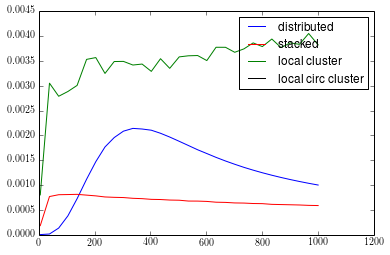

In [859]:
plt.plot(nArray,uniform2dPerfArray, c='b', label='distributed')
plt.plot(nArray,stack2dPerfArray,c='r',label='stacked')
plt.plot(nArray,patch2dPerfArray,c='g', label='local cluster')
plt.plot(nArray,circpatch2dPerfArray,c='black', label='local circ cluster')
plt.legend()

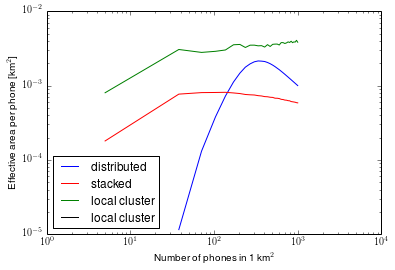

In [860]:
plt.plot(nArray,uniform2dPerfArray, c='b', label='distributed')
plt.plot(nArray,stack2dPerfArray,c='r',label='stacked')
plt.plot(nArray,patch2dPerfArray,c='g', label='local cluster')
plt.plot(nArray,circpatch2dPerfArray,c='black', label='local cluster')
plt.loglog()
plt.ylabel('Effective area per phone [km$^2$]')
plt.xlabel('Number of phones in 1 km^2')
plt.legend(loc='lower left')
plt.savefig('effective_area.pdf')

In [599]:
a=np.random.uniform(0,1,10)
b=np.random.uniform(0,1,10)
a, b, np.dstack((a,b))

(array([ 0.526443  ,  0.49564535,  0.36663368,  0.08279825,  0.89386772,
         0.52248371,  0.63492323,  0.37770491,  0.05800225,  0.35172958]),
 array([ 0.38477678,  0.58168913,  0.00641063,  0.63851798,  0.53968714,
         0.83413254,  0.22260219,  0.78815378,  0.82887715,  0.48420699]),
 array([[[ 0.526443  ,  0.38477678],
         [ 0.49564535,  0.58168913],
         [ 0.36663368,  0.00641063],
         [ 0.08279825,  0.63851798],
         [ 0.89386772,  0.53968714],
         [ 0.52248371,  0.83413254],
         [ 0.63492323,  0.22260219],
         [ 0.37770491,  0.78815378],
         [ 0.05800225,  0.82887715],
         [ 0.35172958,  0.48420699]]]))

In [603]:
np.dstack((a,b))[0].shape

(10, 2)

In [646]:
np.floor(np.linspace(5,501,11))


array([   5.,   54.,  104.,  153.,  203.,  253.,  302.,  352.,  401.,
        451.,  501.])

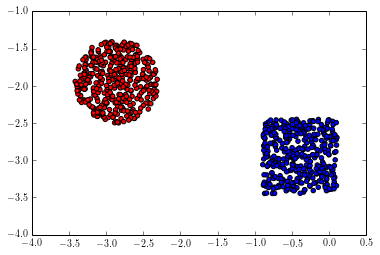

In [741]:
phones = patch2dPhones(400,rho=1,xmax=5)
phones2 = circpatch2dPhones(400,rho=1,xmax=5)

plt.scatter(phones[:,0], phones[:,1])
plt.scatter(phones2[:,0], phones2[:,1], c='r')

\int r (0,x) = x^2/2 
y = uniform(0,r^2/2)
x = sqrt(2 y)

could make a plot of efficiency vs. location of center of shower, or radius from shower center to phone center for a patch. See edge effects... additional effective area that grows like radius of patch.

In [755]:
np.linspace(5,2001,31)

array([    5.        ,    71.53333333,   138.06666667,   204.6       ,
         271.13333333,   337.66666667,   404.2       ,   470.73333333,
         537.26666667,   603.8       ,   670.33333333,   736.86666667,
         803.4       ,   869.93333333,   936.46666667,  1003.        ,
        1069.53333333,  1136.06666667,  1202.6       ,  1269.13333333,
        1335.66666667,  1402.2       ,  1468.73333333,  1535.26666667,
        1601.8       ,  1668.33333333,  1734.86666667,  1801.4       ,
        1867.93333333,  1934.46666667,  2001.        ])

In [771]:
def centerPatch2dPhones(n,x0):
    r=np.sqrt(n/400./np.pi)
    #if d>1: d=1. #things get confusing if the clusters keep growing
    tempr = np.sqrt(2*np.random.uniform(0,r*r/2.,n))
    theta = np.random.uniform(0,2*np.pi,n)
    return np.dstack((tempr*np.cos(theta)+x0,tempr*np.sin(theta)))[0]

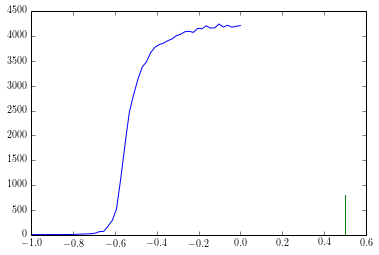

In [806]:
x0array = np.linspace(-1.,0,50)
perfArray = np.zeros(x0array.size)
for i, x0 in enumerate(x0array):
    nMC = 5000
    for j in range(nMC):
        perfArray[i] += airShower(centerPatch2dPhones(400,x0))
plt.plot(x0array,perfArray)

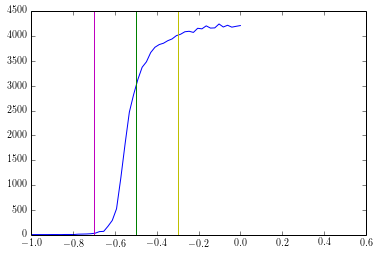

In [826]:
plt.plot(x0array,perfArray)
plt.plot([-0.5,-0.5],[0,4500])
plt.plot([-1,0.5],[4500,4500])
plt.plot([-1,0.5],[4500,4500])
plt.plot([-0.7,-0.7],[0,4500])
plt.plot([-0.3,-0.3],[0,4500])

In [839]:
edge = find(x0array>-.5)[0]
extraperf=cumsum(perfArray)[edge]
center = find(x0array<=0)[-1]
maxperf=perfArray[center]
lessperf = (center-edge)*maxperf - (cumsum(perfArray)[center]-cumsum(perfArray)[edge])
#plt.plot(x0array,cumsum(perfArray))
#plt.plot(x0array,maximum(0,maxperf*(x0array+.5)/(x0array[1]-x0array[0])))
#plt.plot(x0array,maximum(0,extraperf+maxperf*(x0array+.5)/(x0array[1]-x0array[0])))
print edge, extraperf, center, maxperf, (center-edge)*maxperf, (cumsum(perfArray)[center]-cumsum(perfArray)[edge]), lessperf
print extraperf-lessperf

25 12563.0 49 4214.0 101136.0 96250.0 4886.0
7677.0


array([    5.,    38.,    71.,   104.,   137.,   171.,   204.,   237.,
         270.,   303.,   337.,   370.,   403.,   436.,   469.,   503.,
         536.,   569.,   602.,   635.,   669.,   702.,   735.,   768.,
         801.,   835.,   868.,   901.,   934.,   967.,  1001.])